In [1]:
%reload_ext autoreload
%autoreload 2
%env AD_SHOW_FULL_STRINGS=1
from torch_snippets import *
from dotenv import load_dotenv

env: AD_SHOW_FULL_STRINGS=1


In [2]:
sys.path.append('../src/')
load_dotenv('../.env')

True

In [5]:
from vlm import GPT4oMini, Gemini, Claude_35, Florence2, Qwen2, MiniCPM

In [6]:
# gpt4o = GPT4oMini(token=os.environ["OPENAI_API_KEY"])
# gemini = Gemini(token=os.environ["GEMINI_API_KEY"])
claude = Claude_35()
# florence = Florence2()
# qwen2 = Qwen2()
# minicpm = MiniCPM()

In [7]:
# image = '/Users/yeshwanth/Desktop/1000496-2147404800-1.jpeg'
image = '/home/paperspace/tmp/debug-2.jpeg'
task_prompt = "<OCR_WITH_REGION>"
prompt = 'what is the stock value?'

In [8]:
responses = AD(
    # gpt4o=gpt4o(image, prompt),
    # gemini=gemini(image, prompt),
    claude=claude(image, prompt),
    # qwen2=qwen2(image, prompt),
    # florence=florence(image, task_prompt),
    # minicpm=minicpm(image, prompt)
)

BadRequestError: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}

In [34]:
responses


```↯ AttrDict ↯
florence
  <OCR_WITH_REGION>
    quad_boxes[]
      0[]
        0 - 2976.537841796875 (🏷️ float)
        1 - 120.27999877929688 (🏷️ float)
        2 - 3348.385986328125 (🏷️ float)
        3 - 120.27999877929688 (🏷️ float)
        4 - 3348.385986328125 (🏷️ float)
        5 - 179.8000030517578 (🏷️ float)
        6 - 2976.537841796875 (🏷️ float)
        7 - 179.8000030517578 (🏷️ float)
      1[]
        0 - 2976.537841796875 (🏷️ float)
        1 - 179.8000030517578 (🏷️ float)
        2 - 3313.305908203125 (🏷️ float)
        3 - 179.8000030517578 (🏷️ float)
        4 - 3313.305908203125 (🏷️ float)
        5 - 236.83999633789062 (🏷️ float)
        6 - 2976.537841796875 (🏷️ float)
        7 - 236.83999633789062 (🏷️ float)
      2[]
        0 - 833.1499633789062 (🏷️ float)
        1 - 336.0400085449219 (🏷️ float)
        2 - 1110.281982421875 (🏷️ float)
        3 - 338.5199890136719 (🏷️ float)
        4 - 1110.281982421875 (🏷️ float)
        5 - 395.55999755859375 (🏷️ float)


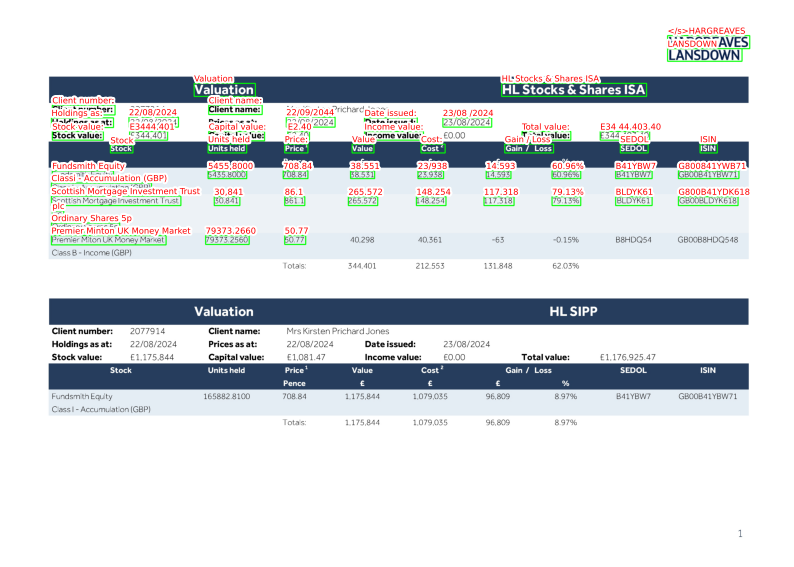

In [33]:
_r = responses.florence['<OCR_WITH_REGION>']
bbs = np.array([(qb[0], qb[1], qb[4], qb[5]) for qb in _r.quad_boxes]).astype(np.uint16)
texts = _r.labels

show(image, bbs=bbs, texts=texts, sz=10)